In [1]:
import os
import pandas as pd
import numpy as np

# set working directory
%cd /Users/qw2/Documents1/Sanger/GL_analysis/13_BC_endo_correlation/03_BC_expressioin_RNA_expression

/Users/qw2/Documents1/Sanger/GL_analysis/13_BC_endo_correlation/03_BC_expressioin_RNA_expression


In [28]:
colnames=['chr', 'start', 'end', 'D0','D2','D5','group','barcode','gene_chr','gene_start','gene_end','gene_name','ENSG','strand_gene'] 
barcode_bed_no_strand = pd.read_csv("03_all_BC_expression_gene.bed",names=colnames,sep="\t", header=None)
barcode_bed_no_strand.head()

,chr,start,end,D0,D2,D5,group,barcode,gene_chr,gene_start,gene_end,gene_name,ENSG,strand_gene
0,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,chr1,6785454,7769706,CAMTA1,ENSG00000171735.19,1
1,chr1,7829505,7829506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,chr1,7784320,7845177,PER3,ENSG00000049246.14,1
2,chr1,8020030,8020031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,chr1,8004404,8026309,ERRFI1,ENSG00000116285.13,-1
3,chr1,8437298,8437299,0.000000,0.000000,0.000000,4,CGGAGTTCAGCCGTAAA,chr1,8352397,8817640,RERE,ENSG00000142599.18,-1
4,chr1,12001279,12001280,0.695881,0.530198,0.045028,1,TGAGTTTTCCGGACGGG,chr1,11980181,12013514,MFN2,ENSG00000116688.16,1


In [29]:
barcode_bed_no_strand.shape

(2976, 14)

In [30]:
barcode_expression_with_strand = pd.read_csv("count_location_merged_with_strand_filter.csv",sep="\,")
barcode_expression_with_strand.head()

/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,D0_1_diffnan,D0_2_diffnan,D0_3_diffnan,D0_4_diffnan,D2_1_diffnan,D2_2_diffnan,D2_3_diffnan,D2_4_diffnan,D5_1_diffnan,...,MspI low,MspI mid,Tat1 37 high,Tat1 37 low,Tat1 37 mid,Tat1 65 high,Tat1 65 low,Tat1 65 mid,ambiguity,sum
0,AATGTTTCTTGTACTGA,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,ACATTAAAGGCGGTCGT,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,ACCGAGTCTGGGGTTAC,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,ACCGATTCGGAATATAC,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ACTCGAAACTATTCTTG,0,0,2,1,0,0,0,0,6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [31]:
barcode_expression_with_strand.shape

(3986, 118)

In [34]:
# extract the barcode and strand from the barcode_expression_with_strand file
barcode_strand = barcode_expression_with_strand[['Unnamed: 0','strand']]
barcode_strand.columns =['barcode', 'strand_barcode']
barcode_strand.head()

,barcode,strand_barcode
0,AATGTTTCTTGTACTGA,-
1,ACATTAAAGGCGGTCGT,+
2,ACCGAGTCTGGGGTTAC,+
3,ACCGATTCGGAATATAC,-
4,ACTCGAAACTATTCTTG,-


In [35]:
# merge the original file with barcode strand dataframe
barcode_bed_with_strand = pd.merge(barcode_bed_no_strand, barcode_strand, how="left", on=["barcode"])
barcode_bed_with_strand.head()

,chr,start,end,D0,D2,D5,group,barcode,gene_chr,gene_start,gene_end,gene_name,ENSG,strand_gene,strand_barcode
0,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,chr1,6785454,7769706,CAMTA1,ENSG00000171735.19,1,NaN
1,chr1,7829505,7829506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,chr1,7784320,7845177,PER3,ENSG00000049246.14,1,NaN
2,chr1,8020030,8020031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,chr1,8004404,8026309,ERRFI1,ENSG00000116285.13,-1,NaN
3,chr1,8437298,8437299,0.000000,0.000000,0.000000,4,CGGAGTTCAGCCGTAAA,chr1,8352397,8817640,RERE,ENSG00000142599.18,-1,+
4,chr1,12001279,12001280,0.695881,0.530198,0.045028,1,TGAGTTTTCCGGACGGG,chr1,11980181,12013514,MFN2,ENSG00000116688.16,1,-


In [36]:
barcode_bed_with_strand.shape

(2976, 15)

In [38]:
test = barcode_bed_with_strand.groupby('strand_barcode').nunique()
test

,chr,start,end,D0,D2,D5,group,barcode,gene_chr,gene_start,gene_end,gene_name,ENSG,strand_gene,strand_barcode
strand_barcode,,,,,,,,,,,,,,,
+,24,1207,1207,761,752,725,4,1232,24,1038,1039,1037,1039,2,1
-,24,1203,1203,733,728,700,4,1221,24,1028,1028,1028,1028,2,1


In [44]:
iPSC_iNeuron_expression = pd.read_csv("04_all_expression_rlog.csv",sep="\,")
iPSC_iNeuron_expression = iPSC_iNeuron_expression.replace('\"','', regex=True)
iPSC_iNeuron_expression.rename(columns={ iPSC_iNeuron_expression.columns[0]: "ENSG" }, inplace = True)
iPSC_iNeuron_expression.head()

/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,ENSG,"""BobNGN2_D00H00_A""","""BobNGN2_D00H00_B""","""BobNGN2_D00H00_C""","""BobNGN2_D00H06_A""","""BobNGN2_D00H06_B""","""BobNGN2_D00H06_C""","""BobNGN2_D00H12_A""","""BobNGN2_D00H12_B""","""BobNGN2_D00H12_C""",...,"""BobNGN2_D01H12_C""","""BobNGN2_D02H00_A""","""BobNGN2_D02H00_B""","""BobNGN2_D02H00_C""","""BobNGN2_D03H00_A""","""BobNGN2_D03H00_B""","""BobNGN2_D03H00_C""","""BobNGN2_D04H00_A""","""BobNGN2_D04H00_B""","""BobNGN2_D04H00_C"""
0,ENSG00000000003.14,12.465089,12.552622,12.482805,12.707693,12.702001,12.730287,12.795635,12.878507,12.809871,...,12.683238,12.407027,12.263767,12.316494,12.133964,12.147767,12.439275,11.868715,11.906413,12.059225
1,ENSG00000000005.6,1.218831,1.769669,1.623042,1.764834,1.685250,1.500342,1.322328,1.399722,1.219718,...,1.282925,1.169139,1.165900,1.252829,1.166621,1.166095,1.180332,1.178125,1.167431,1.176256
2,ENSG00000000419.12,11.839933,11.813258,11.869968,12.028157,11.972054,11.867309,11.905240,12.082347,11.931494,...,12.174290,11.966512,11.785835,11.921255,11.728158,11.854215,12.291912,11.620909,11.440587,11.730203
3,ENSG00000000457.14,8.463072,8.508052,7.392958,8.516796,8.587467,8.438427,8.665660,7.734686,8.631675,...,8.503542,8.960507,9.040231,9.192551,9.410010,9.539985,8.503121,9.127877,9.213196,9.326652
4,ENSG00000000460.17,11.441430,11.381005,11.522394,11.627387,11.416209,11.486273,11.523749,11.545674,11.380934,...,11.204848,10.996393,10.940181,11.010030,10.614284,10.510027,10.540261,9.822583,9.410208,9.620634


In [45]:
# extract the endogenous expression level based on group and +/- strand
# merge barcode_bed_with_strand with iPSC_iNeuron_expression based on ENSG

barcode_bed_with_strand_iPSC_iNeuron_expression = pd.merge(barcode_bed_with_strand, iPSC_iNeuron_expression, how="left", on=["ENSG"])
barcode_bed_with_strand_iPSC_iNeuron_expression.head()

,chr,start,end,D0,D2,D5,group,barcode,gene_chr,gene_start,...,"""BobNGN2_D01H12_C""","""BobNGN2_D02H00_A""","""BobNGN2_D02H00_B""","""BobNGN2_D02H00_C""","""BobNGN2_D03H00_A""","""BobNGN2_D03H00_B""","""BobNGN2_D03H00_C""","""BobNGN2_D04H00_A""","""BobNGN2_D04H00_B""","""BobNGN2_D04H00_C"""
0,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,chr1,6785454,...,11.243693,11.288895,11.242772,11.174502,10.930327,11.147575,11.400851,10.875418,10.901009,10.918397
1,chr1,7829505,7829506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,chr1,7784320,...,8.967689,9.470271,9.617675,9.313988,8.650948,8.389131,7.739897,8.030524,8.089401,8.205644
2,chr1,8020030,8020031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,chr1,8004404,...,7.453840,6.982638,7.131845,7.417623,7.219309,7.041570,6.900124,7.687124,7.189209,6.832228
3,chr1,8437298,8437299,0.000000,0.000000,0.000000,4,CGGAGTTCAGCCGTAAA,chr1,8352397,...,12.568347,12.644178,12.783497,12.811421,12.436759,12.578770,11.378955,12.503123,12.651592,12.418150
4,chr1,12001279,12001280,0.695881,0.530198,0.045028,1,TGAGTTTTCCGGACGGG,chr1,11980181,...,12.878122,13.056090,12.876497,12.866962,12.968560,13.116903,12.340875,12.931341,13.214919,13.163519


In [46]:
barcode_bed_with_strand_iPSC_iNeuron_expression.columns

Index(['chr', 'start', 'end', 'D0', 'D2', 'D5', 'group', 'barcode', 'gene_chr',
       'gene_start', 'gene_end', 'gene_name', 'ENSG', 'strand_gene',
       'strand_barcode', '"BobNGN2_D00H00_A"', '"BobNGN2_D00H00_B"',
       '"BobNGN2_D00H00_C"', '"BobNGN2_D00H06_A"', '"BobNGN2_D00H06_B"',
       '"BobNGN2_D00H06_C"', '"BobNGN2_D00H12_A"', '"BobNGN2_D00H12_B"',
       '"BobNGN2_D00H12_C"', '"BobNGN2_D01H00_A"', '"BobNGN2_D01H00_B"',
       '"BobNGN2_D01H00_C"', '"BobNGN2_D01H12_A"', '"BobNGN2_D01H12_B"',
       '"BobNGN2_D01H12_C"', '"BobNGN2_D02H00_A"', '"BobNGN2_D02H00_B"',
       '"BobNGN2_D02H00_C"', '"BobNGN2_D03H00_A"', '"BobNGN2_D03H00_B"',
       '"BobNGN2_D03H00_C"', '"BobNGN2_D04H00_A"', '"BobNGN2_D04H00_B"',
       '"BobNGN2_D04H00_C"'],
      dtype='object')

In [49]:
# assign and +/+, +/- , -/+ and -/- barcode vs gene group into one column
barcode_bed_with_strand_iPSC_iNeuron_expression['strand_group'] = np.where( ( (barcode_bed_with_strand_iPSC_iNeuron_expression['strand_barcode'] == '+') & (barcode_bed_with_strand_iPSC_iNeuron_expression['strand_gene'] == 1 ) ) | ( (barcode_bed_with_strand_iPSC_iNeuron_expression['strand_barcode'] == '-') & (barcode_bed_with_strand_iPSC_iNeuron_expression['strand_gene'] == -1 ) ), "same_strand", "opposite_strand")
barcode_bed_with_strand_iPSC_iNeuron_expression.head(10)

,chr,start,end,D0,D2,D5,group,barcode,gene_chr,gene_start,...,"""BobNGN2_D02H00_A""","""BobNGN2_D02H00_B""","""BobNGN2_D02H00_C""","""BobNGN2_D03H00_A""","""BobNGN2_D03H00_B""","""BobNGN2_D03H00_C""","""BobNGN2_D04H00_A""","""BobNGN2_D04H00_B""","""BobNGN2_D04H00_C""",strand_group
0,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,chr1,6785454,...,11.288895,11.242772,11.174502,10.930327,11.147575,11.400851,10.875418,10.901009,10.918397,opposite_strand
1,chr1,7829505,7829506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,chr1,7784320,...,9.470271,9.617675,9.313988,8.650948,8.389131,7.739897,8.030524,8.089401,8.205644,opposite_strand
2,chr1,8020030,8020031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,chr1,8004404,...,6.982638,7.131845,7.417623,7.219309,7.041570,6.900124,7.687124,7.189209,6.832228,opposite_strand
3,chr1,8437298,8437299,0.000000,0.000000,0.000000,4,CGGAGTTCAGCCGTAAA,chr1,8352397,...,12.644178,12.783497,12.811421,12.436759,12.578770,11.378955,12.503123,12.651592,12.418150,opposite_strand
4,chr1,12001279,12001280,0.695881,0.530198,0.045028,1,TGAGTTTTCCGGACGGG,chr1,11980181,...,13.056090,12.876497,12.866962,12.968560,13.116903,12.340875,12.931341,13.214919,13.163519,opposite_strand
5,chr1,13760892,13760893,0.000000,0.036431,0.000000,4,ACTCAGATAGCCTGCGG,chr1,13700198,...,12.316536,12.396650,12.396542,12.303729,12.427601,12.006454,12.543641,12.695974,12.376950,opposite_strand
6,chr1,13994772,13994773,0.000000,0.247525,100.414732,4,TTGATGTTTGATTGTCC,chr1,13892792,...,10.738169,10.832989,10.703239,9.817035,9.867858,9.657922,9.945946,9.925974,9.833893,same_strand
7,chr1,14593523,14593524,0.021237,0.020404,0.042836,2,TTAGCGTGGGTCTAGGT,chr1,13892792,...,10.738169,10.832989,10.703239,9.817035,9.867858,9.657922,9.945946,9.925974,9.833893,opposite_strand
8,chr1,14732211,14732212,3.733846,7.249488,2.319824,2,GTATTCATCTTTTTGCA,chr1,13892792,...,10.738169,10.832989,10.703239,9.817035,9.867858,9.657922,9.945946,9.925974,9.833893,same_strand
9,chr1,15034777,15034778,2.384468,3.837214,1.309879,2,GGCGGGAATCCCCCGTA,chr1,13892792,...,10.738169,10.832989,10.703239,9.817035,9.867858,9.657922,9.945946,9.925974,9.833893,same_strand


In [168]:
group = barcode_bed_with_strand_iPSC_iNeuron_expression.groupby('strand_group').nunique()
group

,chr,start,end,D0,D2,D5,group,barcode,gene_chr,gene_start,...,"""BobNGN2_D02H00_A""","""BobNGN2_D02H00_B""","""BobNGN2_D02H00_C""","""BobNGN2_D03H00_A""","""BobNGN2_D03H00_B""","""BobNGN2_D03H00_C""","""BobNGN2_D04H00_A""","""BobNGN2_D04H00_B""","""BobNGN2_D04H00_C""",strand_group
strand_group,,,,,,,,,,,,,,,,,,,,,
opposite_strand,24,1647,1647,861,845,803,4,1656,24,1339,...,1220,1220,1220,1220,1220,1220,1220,1220,1220,1
same_strand,24,1246,1246,932,925,901,4,1280,24,1045,...,966,966,966,966,966,966,966,966,966,1


In [169]:
group.loc['same_strand']['barcode']

1280

In [51]:
# extract the dataframe only for ploting

plot_data = barcode_bed_with_strand_iPSC_iNeuron_expression[['group',
                                                             'strand_group',
                                                            '"BobNGN2_D00H00_A"',
                                                            '"BobNGN2_D00H00_B"',
                                                            '"BobNGN2_D00H00_C"',
                                                            '"BobNGN2_D01H00_A"',
                                                            '"BobNGN2_D01H00_B"',
                                                            '"BobNGN2_D01H00_C"',
                                                            '"BobNGN2_D02H00_A"',
                                                            '"BobNGN2_D02H00_B"',
                                                            '"BobNGN2_D02H00_C"',
                                                            '"BobNGN2_D04H00_A"',
                                                            '"BobNGN2_D04H00_B"',
                                                            '"BobNGN2_D04H00_C"']]

In [52]:
plot_data.head()

,group,strand_group,"""BobNGN2_D00H00_A""","""BobNGN2_D00H00_B""","""BobNGN2_D00H00_C""","""BobNGN2_D01H00_A""","""BobNGN2_D01H00_B""","""BobNGN2_D01H00_C""","""BobNGN2_D02H00_A""","""BobNGN2_D02H00_B""","""BobNGN2_D02H00_C""","""BobNGN2_D04H00_A""","""BobNGN2_D04H00_B""","""BobNGN2_D04H00_C"""
0,3,opposite_strand,11.050502,11.041059,11.037577,11.610207,11.537750,11.393382,11.288895,11.242772,11.174502,10.875418,10.901009,10.918397
1,2,opposite_strand,9.784639,9.908348,10.101097,9.096313,9.070875,9.026180,9.470271,9.617675,9.313988,8.030524,8.089401,8.205644
2,3,opposite_strand,8.378901,8.933095,8.764819,6.863829,6.824237,6.636513,6.982638,7.131845,7.417623,7.687124,7.189209,6.832228
3,4,opposite_strand,12.769071,12.751067,12.761723,12.270001,12.449157,12.436453,12.644178,12.783497,12.811421,12.503123,12.651592,12.418150
4,1,opposite_strand,12.967877,12.981652,12.949011,12.610548,12.861905,12.806346,13.056090,12.876497,12.866962,12.931341,13.214919,13.163519


In [56]:
keys = [c for c in plot_data if c.startswith('"')]
plot_data_melted = pd.melt(plot_data, id_vars=['group','strand_group'],value_vars=keys, value_name='key')
plot_data_melted.head()

,group,strand_group,variable,key
0,3,opposite_strand,"""BobNGN2_D00H00_A""",11.050502
1,2,opposite_strand,"""BobNGN2_D00H00_A""",9.784639
2,3,opposite_strand,"""BobNGN2_D00H00_A""",8.378901
3,4,opposite_strand,"""BobNGN2_D00H00_A""",12.769071
4,1,opposite_strand,"""BobNGN2_D00H00_A""",12.967877


In [57]:
plot_data_melted['time'] = pd.np.where(plot_data_melted.variable.str.contains("D00"), "00h",
                   pd.np.where(plot_data_melted.variable.str.contains("D01"), "24h",
                   pd.np.where(plot_data_melted.variable.str.contains("D02"), "48h", "96h")))
plot_data_melted.head()

,group,strand_group,variable,key,time
0,3,opposite_strand,"""BobNGN2_D00H00_A""",11.050502,00h
1,2,opposite_strand,"""BobNGN2_D00H00_A""",9.784639,00h
2,3,opposite_strand,"""BobNGN2_D00H00_A""",8.378901,00h
3,4,opposite_strand,"""BobNGN2_D00H00_A""",12.769071,00h
4,1,opposite_strand,"""BobNGN2_D00H00_A""",12.967877,00h


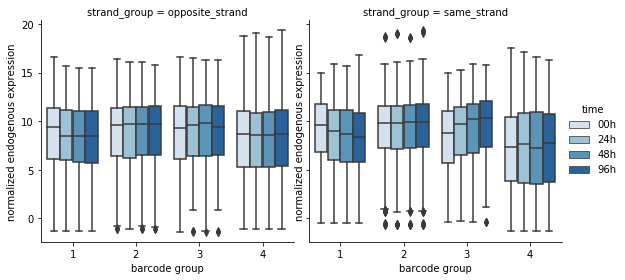

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("mako")
g = sns.catplot(x="group", y="key",
                hue="time", col="strand_group",
                data=plot_data_melted, kind="box",
                height=4, aspect=1,palette="Blues").set(xlabel='barcode group', 
                                                        ylabel='normalized endogenous expression')

plt.savefig('/Users/qw2/Desktop/barcode_endo_with_strand.pdf')


In [78]:
import pybedtools

# use the barcode file, generate different distance bed files,
# closest, +/- 1kb, +/- 2kb, +/- 5kb. +/-10kb, +/-50kb,+/-1MB, within/ outside TAD

barcode_bed_with_strand.head()

,chr,start,end,D0,D2,D5,group,barcode,gene_chr,gene_start,gene_end,gene_name,ENSG,strand_gene,strand_barcode
0,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,chr1,6785454,7769706,CAMTA1,ENSG00000171735.19,1,NaN
1,chr1,7829505,7829506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,chr1,7784320,7845177,PER3,ENSG00000049246.14,1,NaN
2,chr1,8020030,8020031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,chr1,8004404,8026309,ERRFI1,ENSG00000116285.13,-1,NaN
3,chr1,8437298,8437299,0.000000,0.000000,0.000000,4,CGGAGTTCAGCCGTAAA,chr1,8352397,8817640,RERE,ENSG00000142599.18,-1,+
4,chr1,12001279,12001280,0.695881,0.530198,0.045028,1,TGAGTTTTCCGGACGGG,chr1,11980181,12013514,MFN2,ENSG00000116688.16,1,-


In [79]:
barcode_bed_with_strand_clean_bed = barcode_bed_with_strand[['chr','start','end',
                                                            'D0','D2','D5',
                                                            'group','barcode','strand_barcode']]
barcode_bed_with_strand_clean_bed.head()

,chr,start,end,D0,D2,D5,group,barcode,strand_barcode
0,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,NaN
1,chr1,7829505,7829506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,NaN
2,chr1,8020030,8020031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,NaN
3,chr1,8437298,8437299,0.000000,0.000000,0.000000,4,CGGAGTTCAGCCGTAAA,+
4,chr1,12001279,12001280,0.695881,0.530198,0.045028,1,TGAGTTTTCCGGACGGG,-


In [91]:
# Create bedtools object
barcode_bed_with_strand_clean_bed_object = pybedtools.BedTool.from_dataframe(barcode_bed_with_strand_clean_bed)

In [86]:
all_gene_bed = pd.read_csv("../00_input/all_gene_TSS_TES_gene_stable_withVersion.sorted.bed",sep="\t",header=None)
all_gene_bed.columns = ['gene_chr','gene_start','gene_end','gene_name','ENSG','strand']
all_gene_bed.head()

,gene_chr,gene_start,gene_end,gene_name,ENSG,strand
0,chr1,65419,71585,OR4F5,ENSG00000186092.6,1
1,chr1,450703,451697,OR4F29,ENSG00000284733.1,-1
2,chr1,685679,686673,OR4F16,ENSG00000284662.1,-1
3,chr1,923928,944581,SAMD11,ENSG00000187634.12,1
4,chr1,944203,959309,NOC2L,ENSG00000188976.11,-1


In [92]:
# Create bedtools object
all_gene_bed_object = pybedtools.BedTool.from_dataframe(all_gene_bed)

In [96]:
# bedtools generate the closest intersect bed 
# get the closest feature in 'other.bed' on the same strand
closest = barcode_bed_with_strand_clean_bed_object.closest(all_gene_bed_object)
closest.head()

chr1	7360987	7360988	0.545441237	3.7310458360000003	2.5211100159999997	3	AGCTCTGGACGGACGAA	.	chr1	6785454	7769706	CAMTA1	ENSG00000171735.19	1
 chr1	7829505	7829506	1.302296521	3.942666724	1.6149438969999999	2	TACGATCCATGTGGCGG	.	chr1	7784320	7845177	PER3	ENSG00000049246.14	1
 chr1	8020030	8020031	0.007350779	0.0	0.023798191	3	ATCCCTTGTAAGCAACC	.	chr1	8004404	8026309	ERRFI1	ENSG00000116285.13	-1
 chr1	8437298	8437299	0.0	0.0	0.0	4	CGGAGTTCAGCCGTAAA	+	chr1	8352397	8817640	RERE	ENSG00000142599.18	-1
 chr1	12001279	12001280	0.69588108	0.5301977139999999	0.045028355	1	TGAGTTTTCCGGACGGG	-	chr1	11980181	12013514	MFN2	ENSG00000116688.16	1
 chr1	13760892	13760893	0.0	0.036431227000000004	0.0	4	ACTCAGATAGCCTGCGG	-	chr1	13700198	13825079	PRDM2	ENSG00000116731.22	1
 chr1	13994772	13994773	0.0	0.24752475300000001	100.4147317	4	TTGATGTTTGATTGTCC	+	chr1	13892792	15118043	KAZN	ENSG00000189337.17	1
 chr1	14593523	14593524	0.021236892	0.020403999	0.04283619	2	TTAGCGTGGGTCTAGGT	-	chr1	13892792	15118043	K

In [107]:
closest_df = closest.to_dataframe(header=None)
closest_df.columns = ['chr','start','end',
                     'D0','D2','D5','group',
                     'barcode','strand_barcode',
                     'gene_chr','gene_start','gene_end',
                     'gene_name','ENSG','strand_gene']
closest_df.head()

,chr,start,end,D0,D2,D5,group,barcode,strand_barcode,gene_chr,gene_start,gene_end,gene_name,ENSG,strand_gene
0,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,.,chr1,6785454,7769706,CAMTA1,ENSG00000171735.19,1
1,chr1,7829505,7829506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,.,chr1,7784320,7845177,PER3,ENSG00000049246.14,1
2,chr1,8020030,8020031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,.,chr1,8004404,8026309,ERRFI1,ENSG00000116285.13,-1
3,chr1,8437298,8437299,0.000000,0.000000,0.000000,4,CGGAGTTCAGCCGTAAA,+,chr1,8352397,8817640,RERE,ENSG00000142599.18,-1
4,chr1,12001279,12001280,0.695881,0.530198,0.045028,1,TGAGTTTTCCGGACGGG,-,chr1,11980181,12013514,MFN2,ENSG00000116688.16,1


In [104]:
closest_df.shape

(3090, 15)

closest
same_strand_number 1280
opposite_strand_number 1656


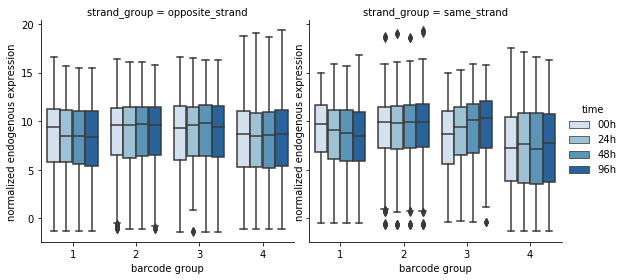

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# generate a function to plot barcode bed correlation with a gene expression file

def plot_endo_corr(file_name,barcode_bed,gene_expression_bed):
    barcode_with_expression = pd.merge(barcode_bed, gene_expression_bed, how="left", on=["ENSG"])
    barcode_with_expression['strand_group'] = np.where( ( (barcode_with_expression['strand_barcode'] == '+') & (barcode_with_expression['strand_gene'] == 1 ) ) | ( (barcode_with_expression['strand_barcode'] == '-') & (barcode_with_expression['strand_gene'] == -1 ) ), "same_strand", "opposite_strand")
    group = barcode_with_expression.groupby('strand_group').nunique()
    same_strand_number = group.loc['same_strand']['barcode']
    opposite_strand_number = group.loc['opposite_strand']['barcode']
    print(file_name)
    print("same_strand_number",same_strand_number)
    print("opposite_strand_number",opposite_strand_number)
    plot_data_with_strand = barcode_with_expression[['group','strand_group',
                                                 '"BobNGN2_D00H00_A"',
                                                 '"BobNGN2_D00H00_B"',
                                                 '"BobNGN2_D00H00_C"',
                                                 '"BobNGN2_D01H00_A"',
                                                 '"BobNGN2_D01H00_B"',
                                                 '"BobNGN2_D01H00_C"',
                                                 '"BobNGN2_D02H00_A"',
                                                 '"BobNGN2_D02H00_B"',
                                                 '"BobNGN2_D02H00_C"',
                                                 '"BobNGN2_D04H00_A"',
                                                 '"BobNGN2_D04H00_B"',
                                                 '"BobNGN2_D04H00_C"']]

    keys = [c for c in plot_data_with_strand if c.startswith('"')]

    plot_data_with_strand_melted = pd.melt(plot_data_with_strand,
                                           id_vars=['group','strand_group'],value_vars=keys, value_name='key')

    plot_data_with_strand_melted['time'] = pd.np.where(plot_data_with_strand_melted.variable.str.contains("D00"), "00h",
                   pd.np.where(plot_data_with_strand_melted.variable.str.contains("D01"), "24h",
                   pd.np.where(plot_data_with_strand_melted.variable.str.contains("D02"), "48h", "96h")))


    sns.color_palette("mako")
    g = sns.catplot(x="group", y="key",
                hue="time", col="strand_group",
                data=plot_data_with_strand_melted, kind="box",
                height=4, aspect=1,palette="Blues").set(xlabel='barcode group', 
                                                        ylabel='normalized endogenous expression')

    plt.savefig(file_name +'.pdf')

plot_endo_corr("closest",closest_df,iPSC_iNeuron_expression)    

In [118]:
# generate funciton to create barcode bed file with defined distance 
barcode_bed_with_strand_clean_bed.head()

,chr,start,end,D0,D2,D5,group,barcode,strand_barcode
0,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,NaN
1,chr1,7829505,7829506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,NaN
2,chr1,8020030,8020031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,NaN
3,chr1,8437298,8437299,0.000000,0.000000,0.000000,4,CGGAGTTCAGCCGTAAA,+
4,chr1,12001279,12001280,0.695881,0.530198,0.045028,1,TGAGTTTTCCGGACGGG,-


In [120]:
barcode_bed_with_strand_clean_bed_1kb = barcode_bed_with_strand_clean_bed.copy()
barcode_bed_with_strand_clean_bed_1kb['start'] = barcode_bed_with_strand_clean_bed_1kb['start'] - 1000
barcode_bed_with_strand_clean_bed_1kb['end'] = barcode_bed_with_strand_clean_bed_1kb['end'] + 1000
barcode_bed_with_strand_clean_bed_1kb.head()

,chr,start,end,D0,D2,D5,group,barcode,strand_barcode
0,chr1,7359987,7361988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,NaN
1,chr1,7828505,7830506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,NaN
2,chr1,8019030,8021031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,NaN
3,chr1,8436298,8438299,0.000000,0.000000,0.000000,4,CGGAGTTCAGCCGTAAA,+
4,chr1,12000279,12002280,0.695881,0.530198,0.045028,1,TGAGTTTTCCGGACGGG,-


In [127]:
# generate bedtools object
barcode_bed_with_strand_clean_bed_1kb_object = pybedtools.BedTool.from_dataframe(barcode_bed_with_strand_clean_bed_1kb)

# intersect with gene object
a_and_b = barcode_bed_with_strand_clean_bed_1kb_object.intersect(all_gene_bed_object,wa=True, wb=True)

intersect_df = a_and_b.to_dataframe(header=None)
intersect_df.columns = ['chr','start','end',
                     'D0','D2','D5','group',
                     'barcode','strand_barcode',
                     'gene_chr','gene_start','gene_end',
                     'gene_name','ENSG','strand_gene']
intersect_df.head()

/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/pybedtools/bedtool.py:3433: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 15 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/pybedtools/bedtool.py:3439: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  return pandas.read_table(self.fn, *args, **kwargs)


,chr,start,end,D0,D2,D5,group,barcode,strand_barcode,gene_chr,gene_start,gene_end,gene_name,ENSG,strand_gene
0,chr1,7359987,7361988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,.,chr1,6785454,7769706,CAMTA1,ENSG00000171735.19,1
1,chr1,7828505,7830506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,.,chr1,7784320,7845177,PER3,ENSG00000049246.14,1
2,chr1,8019030,8021031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,.,chr1,8004404,8026309,ERRFI1,ENSG00000116285.13,-1
3,chr1,8436298,8438299,0.000000,0.000000,0.000000,4,CGGAGTTCAGCCGTAAA,+,chr1,8352397,8817640,RERE,ENSG00000142599.18,-1
4,chr1,12000279,12002280,0.695881,0.530198,0.045028,1,TGAGTTTTCCGGACGGG,-,chr1,11980181,12013514,MFN2,ENSG00000116688.16,1


In [151]:
def generate_intersect(distance,input_bed,all_gene_bed_object):
    barcode_bed_with_strand_clean_bed_tem = input_bed.copy()
    barcode_bed_with_strand_clean_bed_tem['start'] = barcode_bed_with_strand_clean_bed_tem['start'] - distance
    barcode_bed_with_strand_clean_bed_tem['end'] = barcode_bed_with_strand_clean_bed_tem['end'] + distance
    # generate bedtools object
    barcode_bed_with_strand_clean_bed_tem_obj = pybedtools.BedTool.from_dataframe(barcode_bed_with_strand_clean_bed_tem)

    # intersect with gene object
    a_and_b = barcode_bed_with_strand_clean_bed_tem_obj.intersect(all_gene_bed_object,wa=True, wb=True)

    intersect_df = a_and_b.to_dataframe(header=None)
    intersect_df.columns = ['chr','start','end',
                     'D0','D2','D5','group',
                     'barcode','strand_barcode',
                     'gene_chr','gene_start','gene_end',
                     'gene_name','ENSG','strand_gene']
    return intersect_df

data_1kb = generate_intersect(1000,barcode_bed_with_strand_clean_bed,all_gene_bed_object)
data_2kb = generate_intersect(2000,barcode_bed_with_strand_clean_bed,all_gene_bed_object)
data_5kb = generate_intersect(5000,barcode_bed_with_strand_clean_bed,all_gene_bed_object)
data_10kb = generate_intersect(10000,barcode_bed_with_strand_clean_bed,all_gene_bed_object)
data_50kb = generate_intersect(50000,barcode_bed_with_strand_clean_bed,all_gene_bed_object)
data_100kb = generate_intersect(100000,barcode_bed_with_strand_clean_bed,all_gene_bed_object)

/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/pybedtools/bedtool.py:3433: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 15 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/pybedtools/bedtool.py:3439: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  return pandas.read_table(self.fn, *args, **kwargs)
/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/pybedtools/bedtool.py:3433: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 15 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _n

In [133]:
data_1kb.head()

,chr,start,end,D0,D2,D5,group,barcode,strand_barcode,gene_chr,gene_start,gene_end,gene_name,ENSG,strand_gene
0,chr1,7359987,7361988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,.,chr1,6785454,7769706,CAMTA1,ENSG00000171735.19,1
1,chr1,7828505,7830506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,.,chr1,7784320,7845177,PER3,ENSG00000049246.14,1
2,chr1,8019030,8021031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,.,chr1,8004404,8026309,ERRFI1,ENSG00000116285.13,-1
3,chr1,8436298,8438299,0.000000,0.000000,0.000000,4,CGGAGTTCAGCCGTAAA,+,chr1,8352397,8817640,RERE,ENSG00000142599.18,-1
4,chr1,12000279,12002280,0.695881,0.530198,0.045028,1,TGAGTTTTCCGGACGGG,-,chr1,11980181,12013514,MFN2,ENSG00000116688.16,1


1kb
same_strand_number 737
opposite_strand_number 902


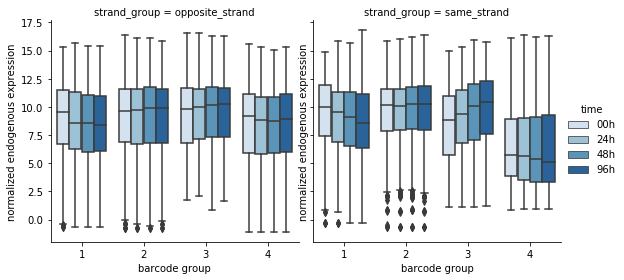

In [171]:
plot_endo_corr('1kb', data_1kb,iPSC_iNeuron_expression)    

2kb
same_strand_number 752
opposite_strand_number 924


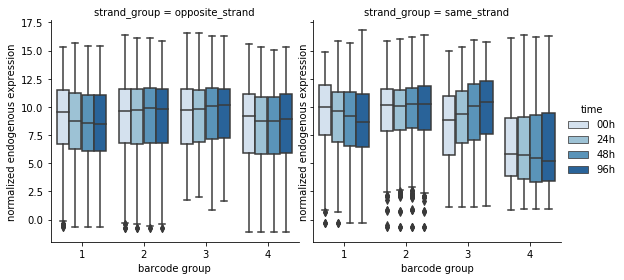

In [172]:
plot_endo_corr('2kb',data_2kb,iPSC_iNeuron_expression)    

5kb
same_strand_number 772
opposite_strand_number 978


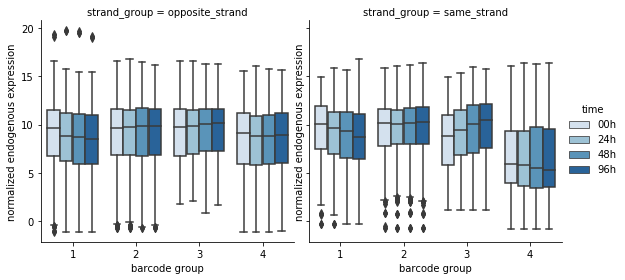

In [173]:
plot_endo_corr('5kb',data_5kb,iPSC_iNeuron_expression)    

10kb
same_strand_number 821
opposite_strand_number 1028


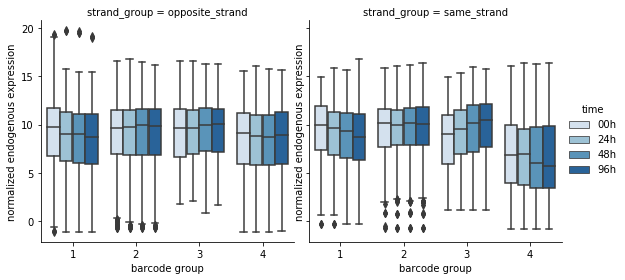

In [174]:
plot_endo_corr('10kb',data_10kb,iPSC_iNeuron_expression)    

50kb
same_strand_number 1036
opposite_strand_number 1305


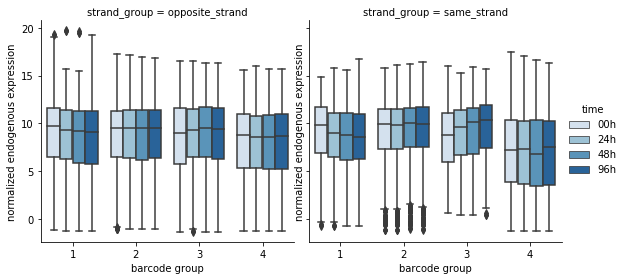

In [175]:
plot_endo_corr('50kb',data_50kb,iPSC_iNeuron_expression)    

100kb
same_strand_number 1265
opposite_strand_number 1563


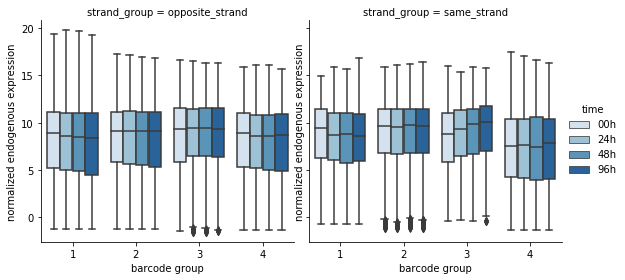

In [176]:
plot_endo_corr('100kb',data_100kb,iPSC_iNeuron_expression)    

In [180]:
# check the intersect with TAD 

in_TAD_bed = pd.read_csv("/Users/qw2/Documents1/Sanger/GL_analysis/32_TAD_highC_analysis/02_TADs_nonTADs/final_TAD/in_TAD.bed",sep="\t",header=None)
out_TAD_bed = pd.read_csv("/Users/qw2/Documents1/Sanger/GL_analysis/32_TAD_highC_analysis/02_TADs_nonTADs/final_TAD/out_TAD.bed",sep="\t",header=None)

In [183]:
in_TAD_bed.columns = ['TAD_chr','TAD_start','TAD_end']
in_TAD_bed['in_or_out'] = "in"
in_TAD_bed.head()

,TAD_chr,TAD_start,TAD_end,in_or_out
0,chr1,800000,6040000,in
1,chr1,6520000,7600000,in
2,chr1,7680000,8360000,in
3,chr1,8360000,8920000,in
4,chr1,9200000,9560000,in


In [184]:
out_TAD_bed.columns = ['TAD_chr','TAD_start','TAD_end']
out_TAD_bed['in_or_out'] = "out"
out_TAD_bed.head()

,TAD_chr,TAD_start,TAD_end,in_or_out
0,chr1,1,800000,out
1,chr1,6040000,6520000,out
2,chr1,7600000,7680000,out
3,chr1,8920000,9200000,out
4,chr1,9560000,9720000,out


In [188]:
# concatinate the in and out together
all_TAD_bed = out_TAD_bed.append(in_TAD_bed, ignore_index=True)
all_TAD_bed.head()

,TAD_chr,TAD_start,TAD_end,in_or_out
0,chr1,1,800000,out
1,chr1,6040000,6520000,out
2,chr1,7600000,7680000,out
3,chr1,8920000,9200000,out
4,chr1,9560000,9720000,out


In [191]:
#exprssion intersect with all_region

# generate bedtools object
all_TAD_bed_obj = pybedtools.BedTool.from_dataframe(all_TAD_bed)

# intersect with gene object
expression_and_TAD = barcode_bed_with_strand_clean_bed_object.intersect(all_TAD_bed_obj,wa=True, wb=True)

intersect_TAD_df = expression_and_TAD.to_dataframe(header=None)

intersect_TAD_df.columns = ['barcode_chr','barcode_start','barcode_end',
                     'D0','D2','D5','group',
                     'barcode','strand_barcode',
                     'TAD_chr','TAD_start','TAD_end',
                     'TAD_in_out']

intersect_TAD_df = intersect_TAD_df[['TAD_chr','TAD_start','TAD_end',
                     'TAD_in_out','barcode_chr','barcode_start','barcode_end',
                     'D0','D2','D5','group',
                     'barcode','strand_barcode']]

intersect_TAD_df.head()



/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/pybedtools/bedtool.py:3433: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/pybedtools/bedtool.py:3439: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  return pandas.read_table(self.fn, *args, **kwargs)


,TAD_chr,TAD_start,TAD_end,TAD_in_out,barcode_chr,barcode_start,barcode_end,D0,D2,D5,group,barcode,strand_barcode
0,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,.
1,chr1,7680000,8360000,in,chr1,7829505,7829506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,.
2,chr1,7680000,8360000,in,chr1,8020030,8020031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,.
3,chr1,8360000,8920000,in,chr1,8437298,8437299,0.000000,0.000000,0.000000,4,CGGAGTTCAGCCGTAAA,+
4,chr1,11800000,12040000,out,chr1,12001279,12001280,0.695881,0.530198,0.045028,1,TGAGTTTTCCGGACGGG,-


In [195]:
# TAD intersect with the gene expression file
TAD_expression_obj = pybedtools.BedTool.from_dataframe(intersect_TAD_df)
TAD_expression = TAD_expression_obj.intersect(all_gene_bed_object,wa=True, wb=True)
TAD_expression_df = TAD_expression.to_dataframe(header=None)
TAD_expression_df.head()

/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/pybedtools/bedtool.py:3433: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 19 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/pybedtools/bedtool.py:3439: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  return pandas.read_table(self.fn, *args, **kwargs)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,3,AGCTCTGGACGGACGAA,.,chr1,6466092,6520061,PLEKHG5,ENSG00000171680.21,-1
1,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,3,AGCTCTGGACGGACGAA,.,chr1,6555307,6579755,TAS1R1,ENSG00000173662.21,1
2,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,3,AGCTCTGGACGGACGAA,.,chr1,6579994,6589280,ZBTB48,ENSG00000204859.13,1
3,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,3,AGCTCTGGACGGACGAA,.,chr1,6590724,6614607,KLHL21,ENSG00000162413.16,-1
4,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,3,AGCTCTGGACGGACGAA,.,chr1,6613731,6624030,PHF13,ENSG00000116273.6,1


In [198]:
TAD_expression_df.columns = ['TAD_chr','TAD_start','TAD_end','TAD_in_out',
                             'barcode_chr','barcode_start','barcode_end',
                             'D0','D2','D5','group','barcode','strand_barcode',
                             'gene_chr','gene_start','gene_end','gene_name','ENSG','strand_gene']
TAD_expression_df.head()

,TAD_chr,TAD_start,TAD_end,TAD_in_out,barcode_chr,barcode_start,barcode_end,D0,D2,D5,group,barcode,strand_barcode,gene_chr,gene_start,gene_end,gene_name,ENSG,strand_gene
0,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,3,AGCTCTGGACGGACGAA,.,chr1,6466092,6520061,PLEKHG5,ENSG00000171680.21,-1
1,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,3,AGCTCTGGACGGACGAA,.,chr1,6555307,6579755,TAS1R1,ENSG00000173662.21,1
2,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,3,AGCTCTGGACGGACGAA,.,chr1,6579994,6589280,ZBTB48,ENSG00000204859.13,1
3,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,3,AGCTCTGGACGGACGAA,.,chr1,6590724,6614607,KLHL21,ENSG00000162413.16,-1
4,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,3,AGCTCTGGACGGACGAA,.,chr1,6613731,6624030,PHF13,ENSG00000116273.6,1


In [199]:
# merge gene expression with the TAD expression
TAD_with_expression = pd.merge(TAD_expression_df, iPSC_iNeuron_expression, how="left", on=["ENSG"])
TAD_with_expression.head()

,TAD_chr,TAD_start,TAD_end,TAD_in_out,barcode_chr,barcode_start,barcode_end,D0,D2,D5,...,"""BobNGN2_D01H12_C""","""BobNGN2_D02H00_A""","""BobNGN2_D02H00_B""","""BobNGN2_D02H00_C""","""BobNGN2_D03H00_A""","""BobNGN2_D03H00_B""","""BobNGN2_D03H00_C""","""BobNGN2_D04H00_A""","""BobNGN2_D04H00_B""","""BobNGN2_D04H00_C"""
0,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,...,11.067807,11.188128,11.326004,11.145250,9.834855,10.065532,9.891483,9.886546,9.946692,9.754646
1,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,...,2.603030,2.469091,2.582729,2.444459,2.927347,2.535677,2.926082,2.560105,2.561640,2.542612
2,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,...,9.769147,9.707417,9.837715,9.836450,9.768425,9.929622,9.941742,9.742029,10.013230,9.646772
3,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,...,11.275994,10.848464,11.031178,11.044363,10.330468,10.568634,10.049667,10.149467,10.097727,10.201932
4,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.52111,...,6.648571,6.406898,6.612944,6.878003,5.635483,4.930494,6.249699,5.614310,6.109660,6.102451


In [200]:
# assign and +/+, +/- , -/+ and -/- barcode vs gene group into one column
TAD_with_expression['strand_group'] = np.where( ( (TAD_with_expression['strand_barcode'] == '+') & (TAD_with_expression['strand_gene'] == 1 ) ) | ( (barcode_bed_with_strand_iPSC_iNeuron_expression['strand_barcode'] == '-') & (TAD_with_expression['strand_gene'] == -1 ) ), "same_strand", "opposite_strand")
TAD_with_expression.head(10)

,TAD_chr,TAD_start,TAD_end,TAD_in_out,barcode_chr,barcode_start,barcode_end,D0,D2,D5,...,"""BobNGN2_D02H00_A""","""BobNGN2_D02H00_B""","""BobNGN2_D02H00_C""","""BobNGN2_D03H00_A""","""BobNGN2_D03H00_B""","""BobNGN2_D03H00_C""","""BobNGN2_D04H00_A""","""BobNGN2_D04H00_B""","""BobNGN2_D04H00_C""",strand_group
0,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.521110,...,11.188128,11.326004,11.145250,9.834855,10.065532,9.891483,9.886546,9.946692,9.754646,opposite_strand
1,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.521110,...,2.469091,2.582729,2.444459,2.927347,2.535677,2.926082,2.560105,2.561640,2.542612,opposite_strand
2,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.521110,...,9.707417,9.837715,9.836450,9.768425,9.929622,9.941742,9.742029,10.013230,9.646772,opposite_strand
3,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.521110,...,10.848464,11.031178,11.044363,10.330468,10.568634,10.049667,10.149467,10.097727,10.201932,opposite_strand
4,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.521110,...,6.406898,6.612944,6.878003,5.635483,4.930494,6.249699,5.614310,6.109660,6.102451,opposite_strand
5,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.521110,...,10.388531,10.636114,10.538599,10.076394,10.365608,10.945256,10.604602,10.160961,10.538307,opposite_strand
6,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.521110,...,6.885544,6.685789,7.165411,7.177347,7.200016,6.243072,6.558318,6.618890,6.454937,opposite_strand
7,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.521110,...,9.649795,9.824011,9.608892,10.016784,9.770156,9.293043,9.655005,9.891558,9.631073,same_strand
8,chr1,6520000,7600000,in,chr1,7360987,7360988,0.545441,3.731046,2.521110,...,11.288895,11.242772,11.174502,10.930327,11.147575,11.400851,10.875418,10.901009,10.918397,opposite_strand
9,chr1,7680000,8360000,in,chr1,7829505,7829506,1.302297,3.942667,1.614944,...,7.529542,7.615235,7.595524,7.921076,7.790387,7.527650,7.575840,7.627309,7.599770,opposite_strand


In [201]:
# extract the dataframe only for ploting

TAD_plot_data = TAD_with_expression[['TAD_in_out','group',
                                     'strand_group',
                                     '"BobNGN2_D00H00_A"',
                                     '"BobNGN2_D00H00_B"',
                                     '"BobNGN2_D00H00_C"',
                                     '"BobNGN2_D01H00_A"',
                                     '"BobNGN2_D01H00_B"',
                                     '"BobNGN2_D01H00_C"',
                                     '"BobNGN2_D02H00_A"',
                                     '"BobNGN2_D02H00_B"',
                                     '"BobNGN2_D02H00_C"',
                                     '"BobNGN2_D04H00_A"',
                                     '"BobNGN2_D04H00_B"',
                                     '"BobNGN2_D04H00_C"']]


In [202]:
TAD_plot_data.head()

,TAD_in_out,group,strand_group,"""BobNGN2_D00H00_A""","""BobNGN2_D00H00_B""","""BobNGN2_D00H00_C""","""BobNGN2_D01H00_A""","""BobNGN2_D01H00_B""","""BobNGN2_D01H00_C""","""BobNGN2_D02H00_A""","""BobNGN2_D02H00_B""","""BobNGN2_D02H00_C""","""BobNGN2_D04H00_A""","""BobNGN2_D04H00_B""","""BobNGN2_D04H00_C"""
0,in,3,opposite_strand,9.447939,9.608640,9.522225,11.781102,11.749471,11.359356,11.188128,11.326004,11.145250,9.886546,9.946692,9.754646
1,in,3,opposite_strand,2.702088,2.473739,3.158550,3.030773,2.972931,3.135331,2.469091,2.582729,2.444459,2.560105,2.561640,2.542612
2,in,3,opposite_strand,10.029785,10.176627,9.973793,9.731125,9.907781,9.786038,9.707417,9.837715,9.836450,9.742029,10.013230,9.646772
3,in,3,opposite_strand,11.637178,11.873932,11.586101,11.250686,11.254784,11.215644,10.848464,11.031178,11.044363,10.149467,10.097727,10.201932
4,in,3,opposite_strand,6.526232,6.664130,7.458644,7.313894,6.759327,6.471580,6.406898,6.612944,6.878003,5.614310,6.109660,6.102451


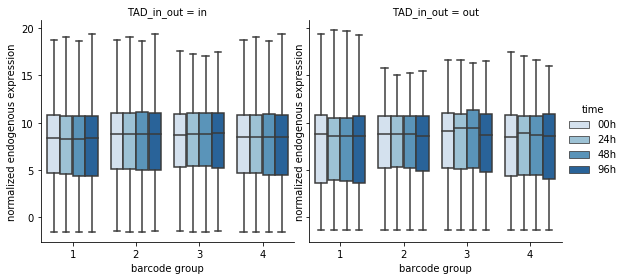

In [207]:
keys = [c for c in TAD_plot_data if c.startswith('"')]

TAD_plot_data_melt = pd.melt(TAD_plot_data,
                             id_vars=['TAD_in_out','group','strand_group'],value_vars=keys, value_name='key')

TAD_plot_data_melt['time'] = pd.np.where(TAD_plot_data_melt.variable.str.contains("D00"), "00h",
               pd.np.where(TAD_plot_data_melt.variable.str.contains("D01"), "24h",
               pd.np.where(TAD_plot_data_melt.variable.str.contains("D02"), "48h", "96h")))


sns.color_palette("mako")
g = sns.catplot(x="group", y="key",
            hue="time", col="TAD_in_out",
            data=TAD_plot_data_melt, kind="box",
            height=4, aspect=1,palette="Blues").set(xlabel='barcode group', 
                                                    ylabel='normalized endogenous expression')

plt.savefig('all_gene_in_out_TAD.pdf')

In [208]:
# generate the closest gene expression, and interect with the TAD, plot the in and out with strand
closest_df.head()

,chr,start,end,D0,D2,D5,group,barcode,strand_barcode,gene_chr,gene_start,gene_end,gene_name,ENSG,strand_gene
0,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,.,chr1,6785454,7769706,CAMTA1,ENSG00000171735.19,1
1,chr1,7829505,7829506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,.,chr1,7784320,7845177,PER3,ENSG00000049246.14,1
2,chr1,8020030,8020031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,.,chr1,8004404,8026309,ERRFI1,ENSG00000116285.13,-1
3,chr1,8437298,8437299,0.000000,0.000000,0.000000,4,CGGAGTTCAGCCGTAAA,+,chr1,8352397,8817640,RERE,ENSG00000142599.18,-1
4,chr1,12001279,12001280,0.695881,0.530198,0.045028,1,TGAGTTTTCCGGACGGG,-,chr1,11980181,12013514,MFN2,ENSG00000116688.16,1


In [210]:
closest_df.columns

Index(['chr', 'start', 'end', 'D0', 'D2', 'D5', 'group', 'barcode',
       'strand_barcode', 'gene_chr', 'gene_start', 'gene_end', 'gene_name',
       'ENSG', 'strand_gene'],
      dtype='object')

In [211]:
closest_df = closest_df[['gene_chr', 'gene_start', 'gene_end', 'gene_name',
       'ENSG', 'strand_gene','chr', 'start', 'end', 'D0', 'D2', 'D5', 'group', 'barcode',
       'strand_barcode']]
closest_df.head()

,gene_chr,gene_start,gene_end,gene_name,ENSG,strand_gene,chr,start,end,D0,D2,D5,group,barcode,strand_barcode
0,chr1,6785454,7769706,CAMTA1,ENSG00000171735.19,1,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,.
1,chr1,7784320,7845177,PER3,ENSG00000049246.14,1,chr1,7829505,7829506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,.
2,chr1,8004404,8026309,ERRFI1,ENSG00000116285.13,-1,chr1,8020030,8020031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,.
3,chr1,8352397,8817640,RERE,ENSG00000142599.18,-1,chr1,8437298,8437299,0.000000,0.000000,0.000000,4,CGGAGTTCAGCCGTAAA,+
4,chr1,11980181,12013514,MFN2,ENSG00000116688.16,1,chr1,12001279,12001280,0.695881,0.530198,0.045028,1,TGAGTTTTCCGGACGGG,-


In [212]:
# gene_intersect with TAD
close_TAD_expression_obj = pybedtools.BedTool.from_dataframe(closest_df)
close_TAD_expression = close_TAD_expression_obj.intersect(all_TAD_bed_obj,wa=True, wb=True)
close_TAD_expression_df = close_TAD_expression.to_dataframe(header=None)
close_TAD_expression_df.head()

/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/pybedtools/bedtool.py:3433: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 19 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/Users/qw2/anaconda3/envs/intall_env/lib/python3.7/site-packages/pybedtools/bedtool.py:3439: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  return pandas.read_table(self.fn, *args, **kwargs)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,chr1,6785454,7769706,CAMTA1,ENSG00000171735.19,1,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,.,chr1,7600000,7680000,out
1,chr1,6785454,7769706,CAMTA1,ENSG00000171735.19,1,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,.,chr1,7680000,8360000,in
2,chr1,6785454,7769706,CAMTA1,ENSG00000171735.19,1,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,.,chr1,6520000,7600000,in
3,chr1,7784320,7845177,PER3,ENSG00000049246.14,1,chr1,7829505,7829506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,.,chr1,7680000,8360000,in
4,chr1,8004404,8026309,ERRFI1,ENSG00000116285.13,-1,chr1,8020030,8020031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,.,chr1,7680000,8360000,in


In [214]:
close_TAD_expression_df.columns = ['gene_chr', 'gene_start', 'gene_end', 'gene_name',
                        'ENSG', 'strand_gene','barcode_chr', 'barcode_start', 'barcode_end', 
                        'D0', 'D2', 'D5', 'group', 'barcode','strand_barcode',
                        'TAD_chr','TAD_start','TAD_end','TAD_in_out']
close_TAD_expression_df.head()

,gene_chr,gene_start,gene_end,gene_name,ENSG,strand_gene,barcode_chr,barcode_start,barcode_end,D0,D2,D5,group,barcode,strand_barcode,TAD_chr,TAD_start,TAD_end,TAD_in_out
0,chr1,6785454,7769706,CAMTA1,ENSG00000171735.19,1,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,.,chr1,7600000,7680000,out
1,chr1,6785454,7769706,CAMTA1,ENSG00000171735.19,1,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,.,chr1,7680000,8360000,in
2,chr1,6785454,7769706,CAMTA1,ENSG00000171735.19,1,chr1,7360987,7360988,0.545441,3.731046,2.521110,3,AGCTCTGGACGGACGAA,.,chr1,6520000,7600000,in
3,chr1,7784320,7845177,PER3,ENSG00000049246.14,1,chr1,7829505,7829506,1.302297,3.942667,1.614944,2,TACGATCCATGTGGCGG,.,chr1,7680000,8360000,in
4,chr1,8004404,8026309,ERRFI1,ENSG00000116285.13,-1,chr1,8020030,8020031,0.007351,0.000000,0.023798,3,ATCCCTTGTAAGCAACC,.,chr1,7680000,8360000,in


same_strand_number 1280
opposite_strand_number 1656


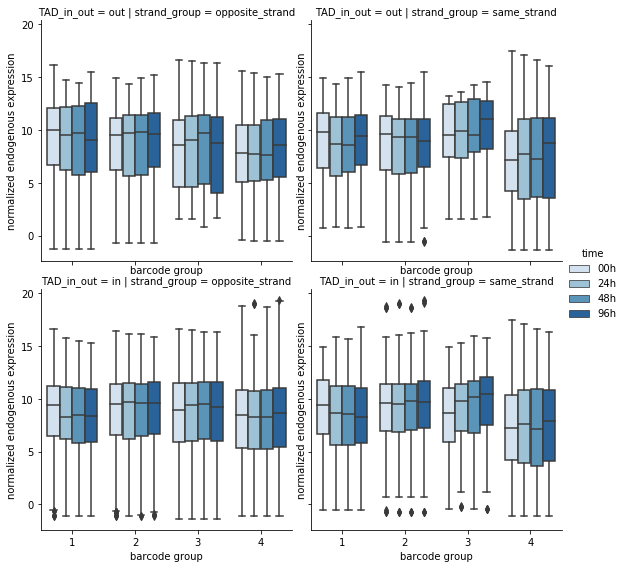

In [218]:
barcode_with_expression = pd.merge(close_TAD_expression_df, iPSC_iNeuron_expression, how="left", on=["ENSG"])
barcode_with_expression['strand_group'] = np.where( ( (barcode_with_expression['strand_barcode'] == '+') & (barcode_with_expression['strand_gene'] == 1 ) ) | ( (barcode_with_expression['strand_barcode'] == '-') & (barcode_with_expression['strand_gene'] == -1 ) ), "same_strand", "opposite_strand")
group = barcode_with_expression.groupby('strand_group').nunique()
same_strand_number = group.loc['same_strand']['barcode']
opposite_strand_number = group.loc['opposite_strand']['barcode']

print("same_strand_number",same_strand_number)
print("opposite_strand_number",opposite_strand_number)
plot_data_with_strand = barcode_with_expression[['group','strand_group','TAD_in_out',
                                             '"BobNGN2_D00H00_A"',
                                             '"BobNGN2_D00H00_B"',
                                             '"BobNGN2_D00H00_C"',
                                             '"BobNGN2_D01H00_A"',
                                             '"BobNGN2_D01H00_B"',
                                             '"BobNGN2_D01H00_C"',
                                             '"BobNGN2_D02H00_A"',
                                             '"BobNGN2_D02H00_B"',
                                             '"BobNGN2_D02H00_C"',
                                             '"BobNGN2_D04H00_A"',
                                             '"BobNGN2_D04H00_B"',
                                             '"BobNGN2_D04H00_C"']]

keys = [c for c in plot_data_with_strand if c.startswith('"')]

plot_data_with_strand_melted = pd.melt(plot_data_with_strand,
                                       id_vars=['group','strand_group','TAD_in_out'],value_vars=keys, value_name='key')

plot_data_with_strand_melted['time'] = pd.np.where(plot_data_with_strand_melted.variable.str.contains("D00"), "00h",
               pd.np.where(plot_data_with_strand_melted.variable.str.contains("D01"), "24h",
               pd.np.where(plot_data_with_strand_melted.variable.str.contains("D02"), "48h", "96h")))


sns.color_palette("mako")
g = sns.catplot(x="group", y="key",
            hue="time", col="strand_group",row="TAD_in_out",
            data=plot_data_with_strand_melted, kind="box",
            height=4, aspect=1,palette="Blues").set(xlabel='barcode group', 
                                                    ylabel='normalized endogenous expression')

plt.savefig('closest_in_out_TAD.pdf')